In [1]:
from model import generator
import torch
from collections import OrderedDict
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## load saved Generator weights

In [2]:
G = generator()

In [3]:
# the weights were saved using nn.DataParallel
state_dict = torch.load('G_weights.pth')
new_state_dict = OrderedDict()
for k,v in state_dict.items():
    new_state_dict[k[7:]] = v # remove the prefix of 'module.'
G.load_state_dict(new_state_dict)

### load an image
03_test.tif was assigned to me

In [4]:
img_path = './03_test.tif'

In [6]:
def read_img(img_path=img_path):
    img = Image.open(img_path).convert("RGB")
    # cropping
    width, height = img.size
    x_m, y_m = width//2, height//2
    x, y = x_m-256, y_m-256
    img = img.crop([x,y,x+512,y+512])
    assert img.size[0] == 512
    
    means = np.array([.585, .256, .136])
    std = np.array([.229, .124, .095])
    img = np.array(img) / 255
    img = (img - means) / std
    img = torch.Tensor(np.rollaxis(img, 2, 0)).unsqueeze(0)
    return img

img = read_img(img_path)

## segmentation

In [9]:
seg_output = G.forward(img)

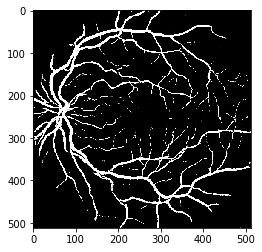

In [10]:
plt.imshow(seg_output.squeeze().detach().numpy(), cmap='gray')

In [11]:
val_data_folder = './val_set/*'
val_imgs = glob.glob(val_data_folder, recursive=True)

In [12]:
val_imgs

['./val_set\\01_test.tif',
 './val_set\\02_test.tif',
 './val_set\\04_test.tif',
 './val_set\\05_test.tif',
 './val_set\\06_test.tif',
 './val_set\\07_test.tif',
 './val_set\\08_test.tif',
 './val_set\\09_test.tif',
 './val_set\\10_test.tif',
 './val_set\\11_test.tif',
 './val_set\\12_test.tif',
 './val_set\\13_test.tif',
 './val_set\\14_test.tif',
 './val_set\\15_test.tif',
 './val_set\\16_test.tif',
 './val_set\\17_test.tif',
 './val_set\\18_test.tif',
 './val_set\\19_test.tif',
 './val_set\\20_test.tif']

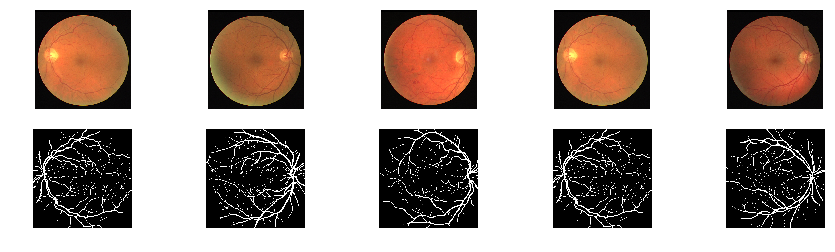

In [19]:
_, axes = plt.subplots(2, 5, figsize=(15, 4))
for i in range(5):
    idx = np.random.randint(0, 19)
    axes[0][i].imshow(Image.open(val_imgs[idx]))
    axes[0][i].axis('off')
    img_output = G.forward(read_img(val_imgs[idx])).squeeze().detach().numpy()
    axes[1][i].imshow(img_output, cmap='gray')
    axes[1][i].axis('off')
